*UID*:

1. 117935837
2. 116887212
3. 117094428
4. 118028941
5. 117760767

Varun Lagadapati, Chibueze Nwade, Leo Li, Vaibhav Sanjay, Eric Liau

# **CMSC426 Final Project: Depth and Contact Prediction**

## Objective

In this project we want to use deep neural networks to predict 3D contact geometry from monocular images of a vision-based tactile sensor.

# Background

  - **Tactile sensors** are devices designed to measure information arising from the physical interaction of robots with their environment. These sensors excel in detecting stimuli resulting from mechanical stimulation, temperature variations, and even pain-like responses.
<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1dBNV2bzJVY4bS70TljKFSjzn7X40vY70" alt="Digit on allgero" width="450"/>
</p>
However, recent sensor developments in this field, often inspired by the biological sense of cutaneous touch, have predominantly concentrated on capturing the 3D geometry of contact. In this project, we aim to extend this focus to predicting such interactions, particularly for GelSight tactile sensors. The figure below illustrates the resolution of tactile sensors when they come into contact with various objects
<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1JtePPB9wisU5XdIZ56P_Omo_84QZmFGk" alt="Digit images"/>
</p>
The papers below contain crucial information on how these sensors work, which could be helpful for success in this project <br>
<a href="http://gelsight.csail.mit.edu/wedge/ICRA2021_Wedge.pdf"> GelSight Wedge: Measuring High-Resolution 3D Contact Geometry with a Compact Robot Finger</a><br>
<a href="https://arxiv.org/pdf/2005.14679.pdf">DIGIT: A Novel Design for a Low-Cost Compact
High-Resolution Tactile Sensor with Application to
In-Hand Manipulation</a>

- **Depth Prediction** is the task of measuring the distance of each pixel relative to the camera. Depth is extracted from either monocular (single) or stereo (multiple views of a scene) images. Traditional methods use multi-view geometry to find the relationship between the images. Newer methods can directly estimate depth by minimizing the regression loss, or by learning to generate a novel view from a sequence. *You can also watch one of the recent works in PRG on reconstructing objects with tactile sensors on [YouTube](https://www.youtube.com/watch?v=38utg590wao)*.


## Objective
In this project, we aim to acquire the inverse sensor model to reconstruct local 3D geometry from a tactile image. The task involves training the model in a supervised manner to predict local heightmaps and contact areas from tactile images. While one potential strategy involves integrating depth and contact prediction within a stacked neural network, such as outlined in [Depth Map Prediction from a Single Image using a Multi-Scale Deep Network](https://arxiv.org/pdf/1406.2283.pdf), we encourage you to propose a novel approach tailored to the specific challenges of the problem. Nevertheless, we'll provide you with a project template to guide your implementation, building upon the principles covered during semester.

**IN THIS PROJECT ALL FUNCTIONS/LIBRARIES ARE ALLOWED**

### Step 1: Dataloading
Create a custom dataset to read images from the [provided dataset](https://drive.google.com/drive/folders/16BcGTVkj4s0y9kWM9vIFo40MdPjRRv7L). For guidance, refer to the [PyTorch tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

In [ ]:
# Download the dataset
!wget -O data.zip https://drive.google.com/uc?id=1ugf1lcUGbQMImWbCEzwQSPKq0PDV-Rer&export=download
!unzip data.zip

In [ ]:
# Download the train dataset
!wget -O data.zip https://shorturl.at/ayEOY
!unzip data.zip

--2023-12-17 23:51:52--  https://shorturl.at/ayEOY
Resolving shorturl.at (shorturl.at)... 104.26.9.129, 172.67.69.88, 104.26.8.129, ...
Connecting to shorturl.at (shorturl.at)|104.26.9.129|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.shorturl.at/ayEOY [following]
--2023-12-17 23:51:53--  https://www.shorturl.at/ayEOY
Resolving www.shorturl.at (www.shorturl.at)... 104.26.8.129, 104.26.9.129, 172.67.69.88, ...
Connecting to www.shorturl.at (www.shorturl.at)|104.26.8.129|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prg.cs.umd.edu/research/AcTExplore_files/mini_depth_dataset.zip [following]
--2023-12-17 23:51:53--  https://prg.cs.umd.edu/research/AcTExplore_files/mini_depth_dataset.zip
Resolving prg.cs.umd.edu (prg.cs.umd.edu)... 128.8.128.42
Connecting to prg.cs.umd.edu (prg.cs.umd.edu)|128.8.128.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117703955 (112M) [

In [ ]:
import gdown
gdown.download(id="1U0Y7ikxjX-wVGKLS_OzegHtmFWXzysHp", quiet=True, use_cookies=False)
!unzip test_dataset.zip

Archive:  test_dataset.zip
  inflating: test/tactile/86.png     
  inflating: test/tactile/120.png    
  inflating: test/tactile/96.png     
  inflating: test/tactile/101.png    
  inflating: test/tactile/90.png     
  inflating: test/tactile/95.png     
  inflating: test/tactile/89.png     
  inflating: test/tactile/119.png    
  inflating: test/tactile/82.png     
  inflating: test/tactile/78.png     
  inflating: test/tactile/91.png     
  inflating: test/tactile/88.png     
  inflating: test/tactile/98.png     
  inflating: test/tactile/85.png     
  inflating: test/tactile/97.png     
  inflating: test/tactile/117.png    
  inflating: test/tactile/112.png    
  inflating: test/tactile/116.png    
  inflating: test/tactile/100.png    
  inflating: test/tactile/87.png     
  inflating: test/tactile/92.png     
  inflating: test/tactile/94.png     
  inflating: test/tactile/109.png    
  inflating: test/tactile/115.png    
  inflating: test/tactile/103.png    
  inflating: test/tacti

In [ ]:
import os
import shutil
#function to store the depth and tactile images in their respective folders
def create_datasets(dataset_path):
  if not os.path.exists("./train"):
    os.mkdir("./train")
  if not os.path.exists("./validation"):
    os.mkdir("./validation")

  if not os.path.exists("./train/depth"):
    os.mkdir("./train/depth")
  if not os.path.exists("./train/tactile"):
    os.mkdir("./train/tactile")

  if not os.path.exists("./validation/depth"):
    os.mkdir("./validation/depth")
  if not os.path.exists("./validation/tactile"):
    os.mkdir("./validation/tactile")


  for subdirectory, directory, files in os.walk(dataset_path):
    num_of_files = len(files)

    if num_of_files > 0:
      i = 0
      for file in files:
        #training files
        if i < (0.8) * num_of_files:
          if (subdirectory[-5:]) == "depth":
            src_file_name = os.path.join(subdirectory, file)
            dest = subdirectory[21:-6] + " " + file
            dest_file_name = os.path.join("./train/depth", dest)
            shutil.copy(src_file_name, dest_file_name)

          else:
            src_file_name = os.path.join(subdirectory, file)
            dest = subdirectory[21:-8] + " " + file
            dest_file_name = os.path.join("./train/tactile", dest)
            shutil.copy(src_file_name, dest_file_name)
        #validation files
        else:
          if (subdirectory[-5:]) == "depth":
            src_file_name = os.path.join(subdirectory, file)
            dest = subdirectory[21:-6] + " " + file
            dest_file_name = os.path.join("./validation/depth", dest)
            shutil.copy(src_file_name, dest_file_name)

          else:
            src_file_name = os.path.join(subdirectory, file)
            dest = subdirectory[21:-8] + " " + file
            dest_file_name = os.path.join("./validation/tactile", dest)
            shutil.copy(src_file_name, dest_file_name)
        i += 1

    # for file in files
    #   print("File:", file)

create_datasets("./mini_depth_dataset")

In [ ]:
from PIL import Image, ImageFile
import numpy as np
tactile_path = os.path.join('./train/tactile', os.listdir('./train/tactile')[0])


# read as PIL images
tactile_sample = Image.open(tactile_path)
tactile_sample.size


(320, 240)

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, utils
from skimage import transform
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import time
import os
import re
from tqdm import tqdm
import random
from imageio import imread
from pathlib import Path
from PIL import Image, ImageFile


class TactileDataset(Dataset):

    def __init__(self, tactile_dir, depth_dir, transform=None):
        super(TactileDataset, self).__init__()

        self.tactile_dir = tactile_dir
        self.depth_dir = depth_dir
        self.transform = transform

    def __len__(self):
        return len(os.listdir(self.tactile_dir))

    def __getitem__(self, idx):
        # construct file paths for current index as paired data
        tactile_path = os.path.join(self.tactile_dir, os.listdir(self.tactile_dir)[idx])
        depth_path = os.path.join(self.depth_dir, os.listdir(self.tactile_dir)[idx])

        # read as PIL images
        tactile_sample = Image.open(tactile_path) # RGB images
        depth_sample = Image.open(depth_path) # Grayscale image

        # train transform
        seed = random.randint(0, 2 ** 32)
        if self.transform:
            random.seed(seed)
            tactile_sample = self.transform(tactile_sample)

            random.seed(seed)
            depth_sample = self.transform(depth_sample)

        # calculate contact mask based on depth
        contact_sample = (depth_sample > 0) # contact sample can be retrieved from depth_sample where depth is greater than 0

        normalize = transforms.Normalize(0.5, 0.5)
        tactile_sample = normalize(tactile_sample)

        # convert to torch tensor
        sample = {'tactile':tactile_sample.float().to('cpu') * 255, 'depth': depth_sample.float().to('cpu') * 255, 'contact': contact_sample}

        return sample

# Add some transformation based on your choice that suits the diversity you expect to see during testing. This step is one of the most important parts that can affect the model's performance.
# you can check https://pytorch.org/vision/stable/transforms.html for existing augmentations
trans_train = transforms.Compose([
    transforms.Resize((240, 320)),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

trans_test = transforms.Compose([
    transforms.Resize((240, 320)), # resize to training images shape
    transforms.ToTensor(),
])

data_dir_train ="./train"
data_dir_valid ="./validation"

bs = 32 # Batch size

dataset_train = TactileDataset(data_dir_train + '/tactile', data_dir_train + '/depth', transform=trans_train)
dataloader_train = DataLoader(dataset_train, batch_size=bs, shuffle=True)

dataset_valid = TactileDataset(data_dir_valid + '/tactile', data_dir_valid + '/depth', transform=trans_test)
dataloader_valid = DataLoader(dataset_valid, batch_size=bs, shuffle=True)

datalen_train = len(dataset_train)
datalen_valid = len(dataset_valid)

print(datalen_train, datalen_valid)


815 200


torch.Size([32, 3, 240, 320])


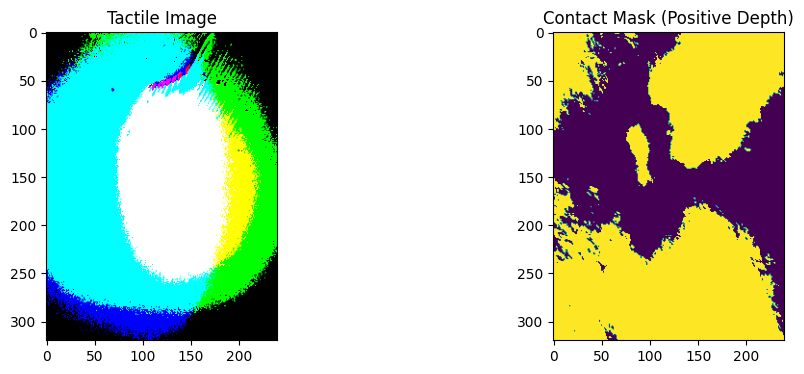

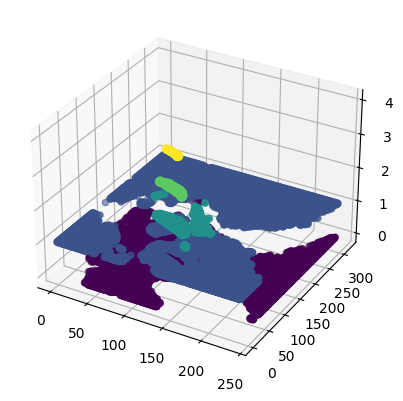

In [ ]:
sample = next(iter(dataloader_train))
tactiles = sample['tactile'].float().to('cpu')
depth = sample['depth']
contact = sample['contact']
print(tactiles.shape)
# Visualize the sample data
plt.figure(figsize=(12, 4))

# Tactile image
plt.subplot(1, 2, 1)
plt.imshow(tactiles[0].permute(2, 1, 0))
plt.title('Tactile Image')
plt.axis('on')

# Contact mask
plt.subplot(1, 2, 2)
plt.imshow(contact[0].permute(2, 1, 0))
plt.title('Contact Mask (Positive Depth)')
plt.axis('on')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

depth_image = depth[0][0]
# depth_image = torch.round(depth_image / 0.0039)
xs = []
ys = []
zs = []
for i in range(240):
  for j in range(320):
    # if depth_image[i][j] > 0.0:
    xs.append(i)
    ys.append(j)
    zs.append(depth_image[i][j])

ax.scatter(xs, ys, zs, c=zs, cmap="viridis")


### Step 2: Network Design
Design the neural network, incorporating various [layers](https://pytorch.org/docs/stable/nn.html). Additionally, consider initializing the layer weights using predefined [PyTorch initializers](https://pytorch.org/docs/stable/nn.init.html). Inpired by [1], you may use Coarse network for contact prediction and a Fine network for depth prediction, providing higher resolution.
<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1_IJxSfYNjsU6wkE0QwSMF4LSvENuJPRL" alt="Digit images"/>
</p>


In [ ]:
import torch.nn.functional as F
from torch.nn.functional import relu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ContactNet(nn.Module):

    def __init__(self, init=True):
        super(ContactNet, self).__init__()
        # define your network layers that takes tactile image and outputs the predicted contact mask
        self.conv1 = nn.Conv2d(3, 96, kernel_size = 11, stride = 4, padding = 0)
        self.conv2 = nn.Conv2d(96, 256, kernel_size = 5, padding = 2)
        self.conv3 = nn.Conv2d(256, 384, kernel_size = 3, padding = 1)
        self.conv4 = nn.Conv2d(384, 384, kernel_size = 3, stride=2)
        self.conv5 = nn.Conv2d(384, 384, kernel_size = 3, padding = 1)
        # self.conv6 = nn.Conv2d(256, 384, kernel_size = 3, padding = 1)
        self.fc1 = nn.Linear(20736, 8192) # 256 * 14 * 19 where 256 is channels, 14 is height, and 19 is width
        self.fc2 = nn.Linear(8192, 4800)
        self.pool = nn.MaxPool2d(2)
        self.dropout = nn.Dropout()
        self.transform = transforms.Resize((320, 240), antialias=True)
        self.upsample_conv = nn.ConvTranspose2d(1, 1, kernel_size=2, stride=2)
        self.sigmoid = torch.sigmoid

        if init:
            for m in self.modules():
              if isinstance(m, nn.Conv2d):
                nn.init.xavier_normal_(m.weight)
              elif isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)


    # Look into transfomring at the end
    def forward(self, x):
        #implement the forward pass to predict the contact
                           #[32, 3, 320, 240]
        x = self.conv1(x)  #[32, 3, 78, 58]
        x = relu(x)
        x = self.pool(x)   #[32, 96, 39, 29]
        x = self.conv2(x)  #[32, 256, 39, 29]
        x = relu(x)
        x = self.pool(x)   #[32, 256, 19, 14]
        x = self.conv3(x)  #[32, 384, 19, 14]
        x = relu(x)
        x = self.conv4(x)  #[32, 384, 9, 6]
        #x = relu(x)
        #x = self.conv5(x)  #[32, 384, 19, 14]
        #print(x.shape)
        x = relu(x)
        x = x.view(x.size(0), -1) #[32, 20736]
        x = relu(self.fc1(x))    #[32, 8192]
        x = self.dropout(x)
        x = self.fc2(x)  #[32, 4800]

        # x = x.view(-1, 1, 80, 60)
        x = x.view(-1, 1, 60, 80)
        x = self.upsample_conv(self.upsample_conv(x)) #[32, 1, 320, 240]
        c = self.sigmoid(x)
        return c #return contact



class TactileDepthNet(nn.Module):

    def __init__(self, init=True):
        super(TactileDepthNet, self).__init__()
        # define your network layers that takes tactile image and outputs the predicted depth (heightmap)
        # super(TactileDepthNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 63, kernel_size = 9, padding = 4)
        self.conv2 = nn.Conv2d(64, 64, kernel_size = 5, padding = 2)
        self.conv3 = nn.Conv2d(64, 1, kernel_size = 5, padding = 2)
        self.pool = nn.MaxPool2d(2)

        if init:
            for m in self.modules():
              if isinstance(m, nn.Conv2d):
                # Look into, look at reference code
                nn.init.xavier_normal_(m.weight)
              elif isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)

    def forward(self, x, contact_output_batch):
        x = relu(self.conv1(x))
        x = torch.cat((x,contact_output_batch),1)
        x = relu(self.conv2(x))
        d = self.conv3(x)
        return d #return depth

# initialize
contact_model = ContactNet(init=True).to(device)
tactile_depth_model = TactileDepthNet(init=True).to(device)


### Step 3: Loss Function


In [ ]:
class Loss(nn.Module):
  def __init__(self):
        super(Loss, self).__init__()

  def forward(self, pred, target):
    # define the loss function based on the task and your expection of network's output
    # loss = F.mse_loss(pred, target)
    # return loss
    loss = torch.mean(torch.linalg.matrix_norm(pred - target, ord=2))
    return loss

#criterion
# Look into
contact_criterion = nn.BCELoss()
#contact_criterion = Loss()
tactile_depth_criterion = Loss()

# learning rate
learning_rate = 0.001

# optimizer
contact_optimizer = torch.optim.Adam(contact_model.parameters(), lr=learning_rate)
#contact_optimizer = torch.optim.Adam([{'params': contact_model.conv1.parameters(), 'lr': learning_rate},{'params': contact_model.conv2.parameters(), 'lr': learning_rate},{'params': contact_model.conv3.parameters(), 'lr': learning_rate},{'params': contact_model.conv4.parameters(), 'lr': learning_rate},{'params': contact_model.conv5.parameters(), 'lr': learning_rate},{'params': contact_model.fc1.parameters(), 'lr': 0.1},{'params': contact_model.fc2.parameters(), 'lr': 0.1}], lr = learning_rate)

tactile_depth_optimizer = torch.optim.Adam(tactile_depth_model.parameters(), lr=learning_rate)
#tactile_depth_optimizer = torch.optim.Adam([{'params': tactile_depth_model.conv1.parameters(), 'lr': learning_rate},{'params': tactile_depth_model.conv2.parameters(), 'lr': learning_rate},{'params': tactile_depth_model.conv3.parameters(), 'lr': learning_rate}], lr = learning_rate)

# data parallel
contact_model = nn.DataParallel(contact_model)
tactile_depth_model = nn.DataParallel(tactile_depth_model)

In [ ]:
def plot_losses(train_losses, valid_losses):
    plt.plot(train_losses, label='train losses')
    plt.plot(valid_losses, label='valid losses')

    plt.xlabel("Iterations")
    plt.ylabel("Losses")

    plt.legend()
    plt.title("Losses")
    plt.grid(True)

In [ ]:
# tactiles = tactiles.to(device)
# depth = depth.to(device)
# contact = contact.to(device)
# output = contact_model(tactiles)
# print(output.shape)
# print(contact.shape)
# loss_res = contact_criterion(output, contact)
# print(loss_res)

# output = tactile_depth_model(tactiles, contact)
# loss_res = tactile_depth_criterion(output, contact)
# print(loss_res)

### Step 4: Training Networks

100%|██████████| 10/10 [02:09<00:00, 12.91s/it]


Time used (Sec):  129.0915184020996  per epoch used:  12.909151840209962


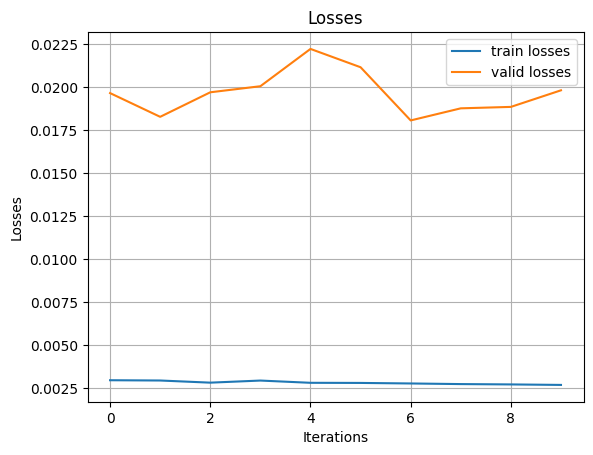

In [ ]:
## Contact Model
train_losses = []
valid_losses = []
tl_b = []

start = time.time()
num_epochs = 10 # Adjust depending on the performance
for epoch in tqdm(range(num_epochs)):

    train_loss = 0
    contact_model.train()
    for i, samples in enumerate(dataloader_train):

        tactiles = samples['tactile'].float().to(device)
        contacts = samples['contact'].float().to(device)

        # forward pass
        output = contact_model(tactiles)

        # compute contact loss
        loss = contact_criterion(output, contacts)

        # backward pass
        contact_optimizer.zero_grad()
        loss.backward()

        # optimization
        contact_optimizer.step()

        train_loss += loss.item()
        tl_b.append(loss.item())

    train_losses.append(train_loss / datalen_train)

    valid_loss = 0
    contact_model.eval()
    with torch.no_grad():
        for i, samples in enumerate(dataloader_valid):

            tactiles = samples['tactile'].float().to(device)
            contacts = samples['contact'].float().to(device)

            # forward pass contact_model
            output = contact_model(tactiles)
            # compute contact loss
            loss = contact_criterion(output, contacts)

            valid_loss += loss.item()

    valid_losses.append(valid_loss / datalen_valid)

    # save contact_model with torch.save
    torch.save(contact_model.state_dict(), "./contact_model.pth")

elapse = time.time() - start
print('Time used (Sec): ', elapse, ' per epoch used: ', elapse / num_epochs)
plot_losses(train_losses, valid_losses)

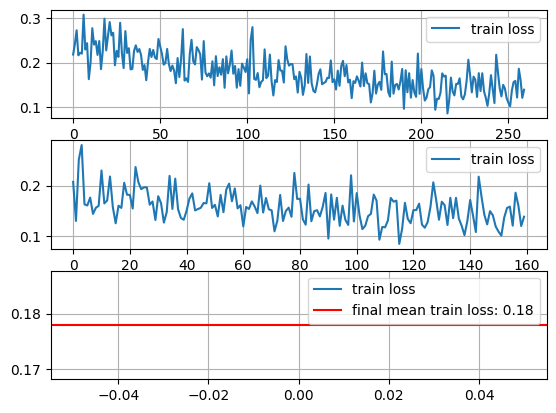

In [ ]:
plt.subplot(311)
plt.plot(tl_b, label='train loss')
plt.grid(True)
plt.legend()

plt.subplot(312)
plt.plot(tl_b[100:], label='train loss')
plt.grid(True)
plt.legend()

plt.subplot(313)
plt.plot(tl_b[300:], label='train loss')
fml = np.mean(tl_b[-320:])
plt.axhline(y = fml, color='r', linestyle='-', label='final mean train loss: {:.2f}'.format(fml))
plt.grid(True)
plt.legend()

> > > > > > > > > > Time used (Sec):  263.85663866996765  per epoch used:  26.385663866996765


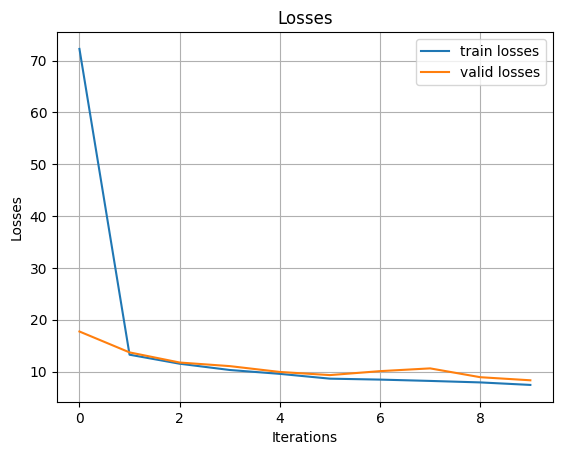

In [ ]:
## Tactile Depth Model
train_losses_, valid_losses_ = [], []
tl_b_ = []
start = time.time()
for epoch in range(num_epochs):

    print('>', end=' ')

    train_loss = 0
    tactile_depth_model.train()
    for i, samples in enumerate(dataloader_train):

        tactiles = samples['tactile'].float().to(device)
        depths = samples['depth'].float().to(device)

        # results from contact
        contact_results = contact_model(tactiles)
        # forward pass
        output = tactile_depth_model(tactiles, contact_results)
        # compute loss from tactile_depth_criterion
        loss = tactile_depth_criterion(output, depths)
        # backward pass
        tactile_depth_optimizer.zero_grad()
        loss.backward()
        # optimization
        tactile_depth_optimizer.step()

        train_loss += loss.item()
        tl_b_.append(loss.item())

    train_losses_.append(train_loss / datalen_train)

    valid_loss = 0
    tactile_depth_model.eval()
    with torch.no_grad():
        for i, samples in enumerate(dataloader_valid):

            tactiles = samples['tactile'].float().to(device)
            depths = samples['depth'].float().to(device)

            # results from tactile_depth network
            #tactile_depth_model.eval()
            #with torch.no_grad():
            # results from contact
            contact_results = contact_model(tactiles)

            # forward pass tactile_depth_model
            output = tactile_depth_model(tactiles, contact_results)
            # compute loss from tactile_depth_criterion
            loss = tactile_depth_criterion(output, depths)

            valid_loss += loss.item()
    valid_losses_.append(valid_loss / datalen_valid)

    # save save tactile_depth_model with torch.save
    torch.save(tactile_depth_model.state_dict(), "./tactile_depth_model.pth")

elapse = time.time() - start
print('Time used (Sec): ', elapse, ' per epoch used: ', elapse / num_epochs)
plot_losses(train_losses_, valid_losses_)

tensor([[[ 1.6858,  0.8998, -1.7653,  ...,  0.6269, -1.0484,  1.8141],
         [ 1.2432,  1.6663,  0.0650,  ...,  1.7059,  0.9811, -1.0209],
         [ 1.9010,  1.7667,  0.2128,  ...,  2.2722,  1.2226, -0.5476],
         ...,
         [-3.3995, -0.2058, -0.2923,  ...,  1.3453,  1.4746,  1.1587],
         [-4.3126, -3.2961,  1.1383,  ...,  2.8563,  4.8352,  4.7996],
         [-1.4184, -1.4065,  0.6821,  ...,  1.8766,  3.7678,  5.0249]]],
       device='cuda:0')


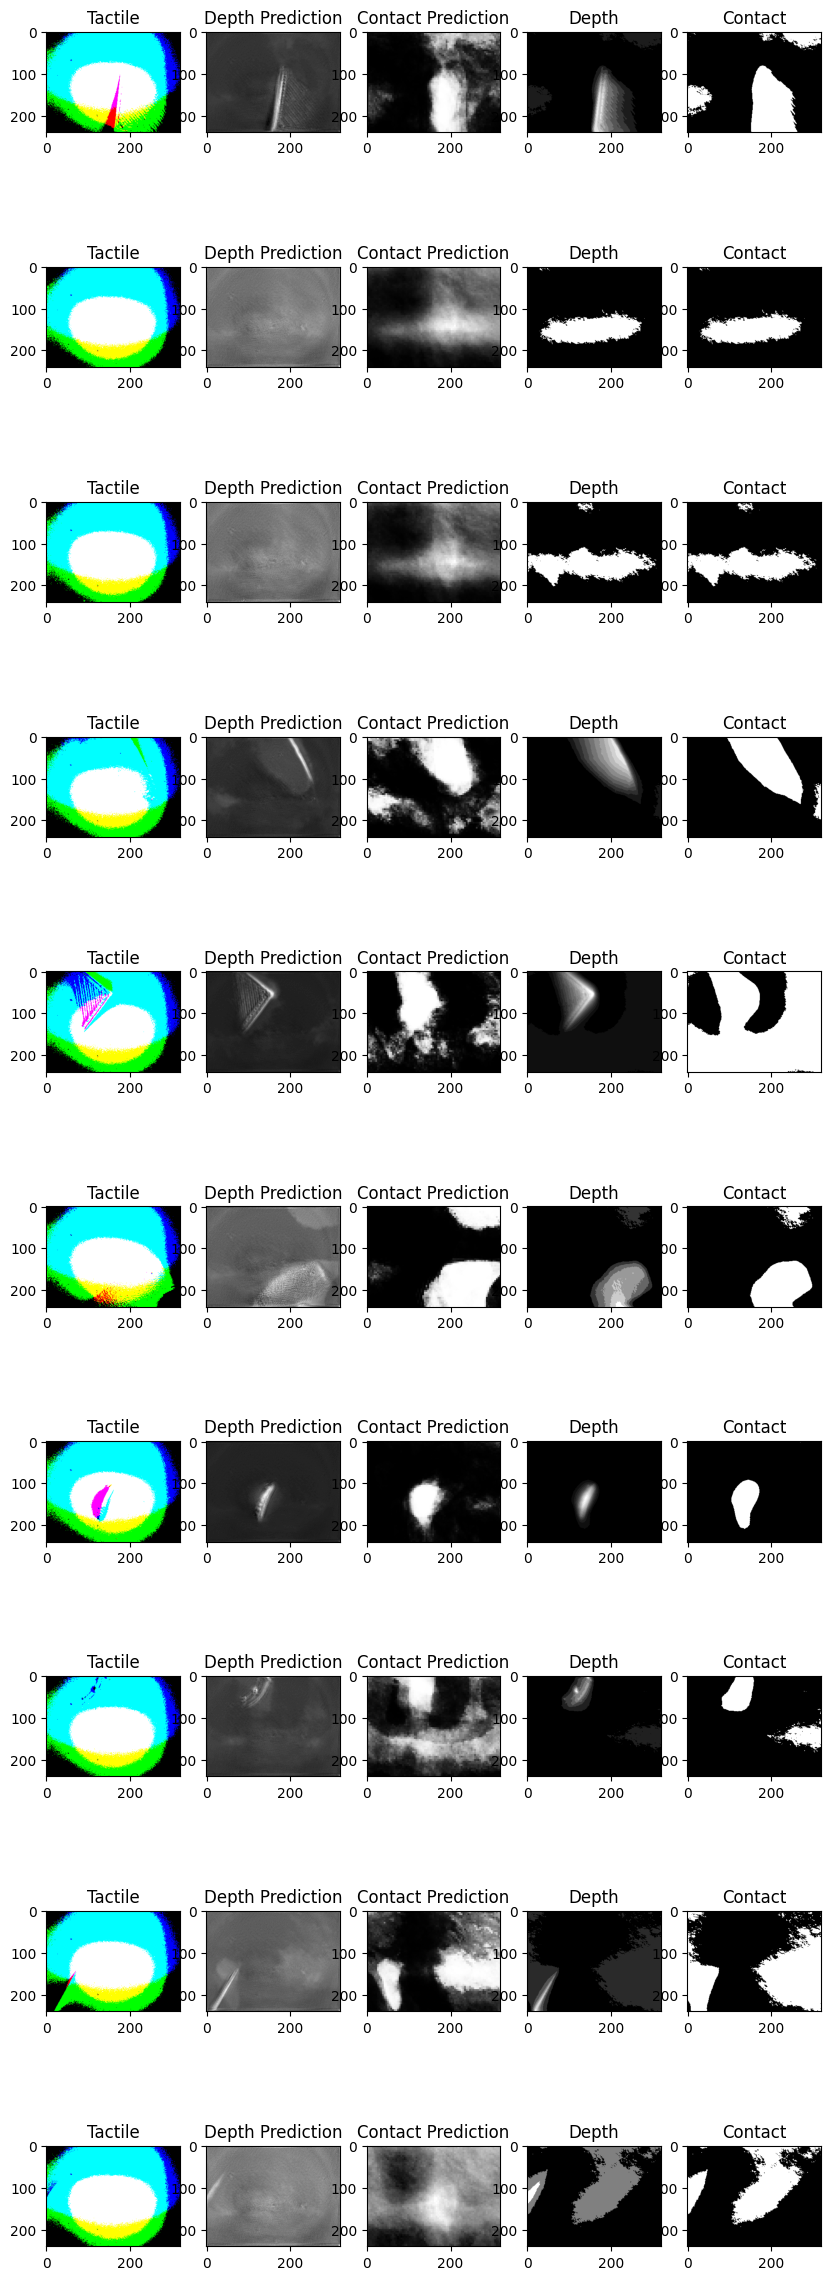

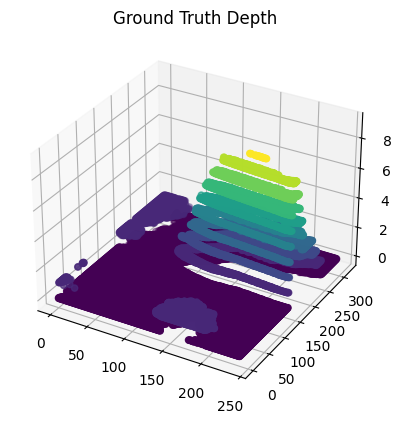

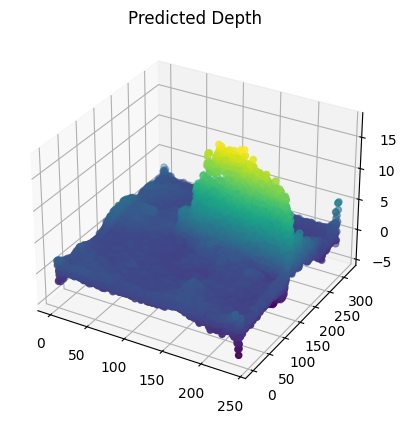

In [ ]:
## Evaluation
import cv2
outputs = np.array([])
fig, axs = plt.subplots(10, 5, figsize=(10, 30))
num_samples = 0
for i, samples in enumerate(dataloader_valid):
    if i >= 100:
      break

    tactiles = samples['tactile'].float().to(device)
    depths = samples['depth'].float().to(device)
    contact = samples['contact'].float().to('cpu')

    # results from contact network
    contact_model.eval()
    with torch.no_grad():
        contact_output = contact_model(tactiles)

    # contact_output = torch.round(contact_output)


    # results from tactile depth network
    tactile_depth_model.eval()
    with torch.no_grad():
        tactile_depth_output = tactile_depth_model(tactiles, contact_output)

    print(tactile_depth_output[0])
    # show 10 sample images (from both the train and test sets) in a subplot figure. Each row should represent a tactile image, and there should be three columns: the original image, the predicted depth, and the predicted contact.
    for j in range(10):
    #   image_numpy = tactile_depth_output[j].cpu().numpy()[0]
    #   cv2.cvtColor(image_numpy,cv2.COLOR_GRAY2RGB)
    #   for row in range(240):
    #     for col in range(320):
    #       if image_numpy[row][col] < 0.015:
    #         image_numpy[row][col] = 0.0
    #   image_numpy = cv2.normalize(image_numpy, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    #   image_numpy = image_numpy.astype(np.uint8)
    #   image_numpy = cv2.equalizeHist(image_numpy)

      # Tactile image
      axs[j, 0].imshow(tactiles[j].cpu().permute(1, 2, 0))
      axs[j, 0].set_title("Tactile")
      axs[j, 1].imshow(tactile_depth_output[j].cpu().permute(1, 2, 0), cmap='gray')
      axs[j, 1].set_title("Depth Prediction")
      axs[j, 2].imshow(contact_output[j].cpu().permute(1, 2, 0), cmap='gray')
      axs[j, 2].set_title("Contact Prediction")
      axs[j, 3].imshow(depths[j].cpu().permute(1, 2, 0), cmap='gray')
      axs[j, 3].set_title("Depth")
      axs[j, 4].imshow(contact[j].cpu().permute(1, 2, 0), cmap='gray')
      axs[j, 4].set_title("Contact")

      # ax = fig.add_subplot(projection='3d')
      # image_numpy = tactile_depth_output[j].cpu().numpy()[0]
      # xs = []
      # ys = []
      # zs = []
      # for row in range(240):
      #   for col in range(320):
      #     # if depth_image[i][j] > 0.0:
      #     xs.append(i)
      #     ys.append(j)
      #     zs.append(image_numpy[row][col])

      # ax.scatter(xs, ys, zs, c=zs, cmap="viridis")
      # ax.set_title("Depth Prediction")


    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    depth_image = depths[0][0]
    # depth_image = torch.round(depth_image / 0.0039)
    depth_image = depth_image.cpu().numpy()
    xs = []
    ys = []
    zs = []
    for i in range(240):
      for j in range(320):
        # if depth_image[i][j] > 0.0:
        xs.append(i)
        ys.append(j)
        zs.append(depth_image[i][j])

    ax.scatter(xs, ys, zs, c=zs, cmap="viridis")
    plt.title("Ground Truth Depth")

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    depth_prediction_image = tactile_depth_output[0][0]
    # depth_prediction_image = torch.round(depth_prediction_image / 0.0039)
    depth_prediction_image = depth_prediction_image.cpu().numpy()
    xs = []
    ys = []
    zs = []
    for i in range(240):
      for j in range(320):
        # if depth_prediction_image[i][j] > 0.0:
        xs.append(i)
        ys.append(j)
        zs.append(depth_prediction_image[i][j])

    ax.scatter(xs, ys, zs, c=zs, cmap="viridis")
    plt.title("Predicted Depth")


      # fig = plt.figure()
      # ax = fig.add_subplot(projection='3d')

      # depth_prediction = tactile_depth_output[0][0]
      # depth_prediction = torch.round(depth_prediction / 0.0039)
      # xs = [i for i in range(240) for _ in range(320)]
      # ys = [j for i in range(240) for j in range(320)]
      # zs = []
      # for i in range(240):
      #   for j in range(320):
      #     if depth_prediction[i][j] > 0.0:
      #       zs.append(depth_prediction[i][j] + 1)

      # ax.scatter(xs, ys, zs, color=(0, 0, 0))



    #print(depths[0])
    #print(tactile_depth_output[0])


    break

Define a function below that instantializes the networks again and loads the weights for new predictions. This function will be used for testing purposes.

In [ ]:
class TactileTestDataset(Dataset):

    def __init__(self, tactile_dir, transform=None):
        super(TactileTestDataset, self).__init__()

        self.tactile_dir = tactile_dir
        self.transform = transform

    def __len__(self):
        return len(os.listdir(self.tactile_dir))

    def __getitem__(self, idx):
        # construct file paths for current index as paired data
        tactile_path = os.path.join(self.tactile_dir, os.listdir(self.tactile_dir)[idx])

        # read as PIL images
        tactile_sample = Image.open(tactile_path) # RGB images

        # train transform
        seed = random.randint(0, 2 ** 32)
        if self.transform:
            random.seed(seed)
            tactile_sample = self.transform(tactile_sample)

        # convert to torch tensor
        sample = { 'tactile':tactile_sample.float().to('cpu') * 255, 'path': tactile_path }

        return sample

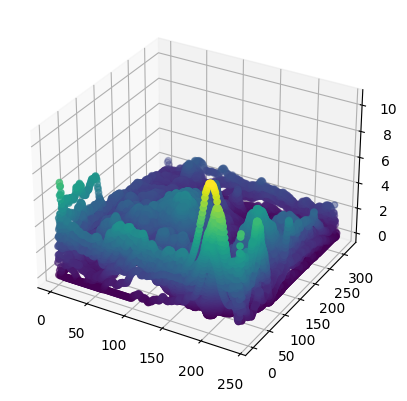

In [ ]:
import cv2
from torchvision.utils import save_image

test_dataset = TactileTestDataset('./test/tactile', transform=trans_test)
dataloader_test = DataLoader(test_dataset, batch_size=bs, shuffle=True)
for i, samples in enumerate(dataloader_test):
  tactiles = samples['tactile'].float().to(device)
  paths = samples['path']

  # results from contact network
  contact_model.eval()
  with torch.no_grad():
    contact_output = contact_model(tactiles)

  # contact_output = torch.round(contact_output)

  # results from tactile depth network
  tactile_depth_model.eval()
  with torch.no_grad():
    tactile_depth_output = tactile_depth_model(tactiles, contact_output)

    for j in range(len(paths)):
      # if j > 5:
      #   break
      img_name = paths[j][paths[j].rfind('/')+1:]
      if img_name != "121.png":
        continue
      if not os.path.exists("./TEST_RESULTS"):
        os.mkdir("./TEST_RESULTS")
      image_numpy = tactile_depth_output[j].cpu().numpy()[0]
      cv2.cvtColor(image_numpy,cv2.COLOR_GRAY2RGB)
      for row in range(240):
        for col in range(320):
          if image_numpy[row][col] < 0.0:
            image_numpy[row][col] = 0.0
      # image_numpy = cv2.normalize(image_numpy, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
      # image_numpy = image_numpy.astype(np.uint8)
      # image_numpy = image_numpy / 6
      cv2.imwrite('./TEST_RESULTS/' + img_name, image_numpy)
      fig = plt.figure()
      ax = fig.add_subplot(projection='3d')
      xs = []
      ys = []
      zs = []
      for i in range(240):
        for j in range(320):
          # if depth_image[i][j] > 0.0:
          xs.append(i)
          ys.append(j)
          zs.append(image_numpy[i][j])

      ax.scatter(xs, ys, zs, c=zs, cmap="viridis")
      # plt.figure(figsize=(12, 6))
      # # Tactile image
      # plt.subplot(1, 3, 1)
      # plt.imshow(tactiles[j].cpu().permute(2, 1, 0))
      # plt.title('Tactile Image')
      # plt.axis('off')

      # plt.subplot(1, 3, 2)
      # plt.imshow(image_numpy, cmap='gray')
      # plt.title('Depth Image')
      # plt.axis('off')

    # plt.figure(figsize=(12, 6))
    # # Tactile image
    # plt.subplot(1, 3, 1)
    # plt.imshow(tactiles[0].cpu().permute(2, 1, 0))
    # plt.title('Tactile Image')
    # plt.axis('off')

    # plt.subplot(1, 3, 2)
    # plt.imshow(tactile_depth_output[0].cpu().permute(2, 1, 0), cmap='gray')
    # plt.title('Depth Image')
    # plt.axis('off')

    # # Contact mask
    # plt.subplot(1, 3, 3)
    # plt.imshow(contact_output[0].cpu().permute(2, 1, 0), cmap='gray')
    # plt.title('Contact Mask (Positive Depth)')
    # plt.axis('off')

In [ ]:
!zip -r './TEST_RESULTS.zip' './TEST_RESULTS'

updating: TEST_RESULTS/ (stored 0%)
updating: TEST_RESULTS/78.png (deflated 43%)
updating: TEST_RESULTS/109.png (deflated 42%)
updating: TEST_RESULTS/98.png (deflated 20%)
updating: TEST_RESULTS/20.png (deflated 41%)
updating: TEST_RESULTS/21.png (deflated 31%)
updating: TEST_RESULTS/59.png (deflated 30%)
updating: TEST_RESULTS/105.png (deflated 26%)
updating: TEST_RESULTS/43.png (deflated 27%)
updating: TEST_RESULTS/49.png (deflated 19%)
updating: TEST_RESULTS/92.png (deflated 45%)
updating: TEST_RESULTS/25.png (deflated 28%)
updating: TEST_RESULTS/69.png (deflated 24%)
updating: TEST_RESULTS/13.png (deflated 24%)
updating: TEST_RESULTS/100.png (deflated 41%)
updating: TEST_RESULTS/35.png (deflated 32%)
updating: TEST_RESULTS/52.png (deflated 34%)
updating: TEST_RESULTS/40.png (deflated 38%)
updating: TEST_RESULTS/6.png (deflated 35%)
updating: TEST_RESULTS/1.png (deflated 20%)
updating: TEST_RESULTS/115.png (deflated 44%)
updating: TEST_RESULTS/103.png (deflated 18%)
updating: TEST_R

In [ ]:
def predict(tactile_image, contact_model_path, tactile_model_path):
    # contact_model = torch.load(contact_model_path)
    # tactile_depth_model = torch.load(tactile_model_path)

    #results from contact model
    contact_model.eval()
    with torch.no_grad():
        contact = contact_model(tactile_image)

    # results from tactile depth network
    tactile_depth_model.eval()
    with torch.no_grad():
        depth = tactile_depth_model(tactile_image, contact)

    return contact, depth

In [ ]:
class Predictor:
    def __init__(self):
        self.dir = "submission/depth"
        self.n = 320
        self.m = 240

    def predict(self, depth):
        return np.asarray(Image.open(f"{depth}.png"))

**Grading Criteria:**


Every group is required to present their project in person. Grading will be based on the performance on unseen data. Therefore, your choice of data augmentations, network design, etc., will be crucial aspects to focus on.

Refrences:

[1] [Depth Map Prediction from a Single Image
using a Multi-Scale Deep Network](https://arxiv.org/pdf/1406.2283.pdf)

[2] [MidasTouch: Monte-Carlo inference over
distributions across sliding touch](https://arxiv.org/pdf/2210.14210.pdf)

[3] [depth-eigen](https://github.com/shuuchen/depth_eigen/tree/master)


In [2]:
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/117935837, 116887212, 117094428, 118028941, and 117760767_proj4.ipynb"

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-lo